In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
import cv2
from sklearn import svm
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [2]:
X = np.load("DataForSVM/XAugDATA.npy")
y = np.load("DataForSVM/yAugLabels.npy")
#print(len(X))
#print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(len(X_train))
print(len(X_test))

5566
1392


In [3]:
y_train_binarized = label_binarize(y_train, classes = [0,1,2,3,4,5,6,7])
y_test_binarized = label_binarize(y_test, classes = [0,1,2,3,4,5,6,7])

print(X_train[:2])
print(y_train[:2])
print(X_test[:2])
print(y_test[:2])
print(y_train_binarized[:2])
print("ytestbin:",y_test_binarized[:2])

[[0.583838   0.35009    0.928336   0.555159   0.407303   0.937863
  0.536767   0.399059   0.854594   0.485647   0.41016    0.900806
  0.436605   0.418196   0.849698   0.577588   0.412712   0.839474
  0.632772   0.39639    0.827755   0.679726   0.366298   0.887009
  0.5        0.5        0.737107   0.487692   0.4917     0.679611
  0.397889   0.47817    0.683587   0.314107   0.48905    0.662881
  0.508192   0.518984   0.70926    0.487826   0.628019   0.716646
  0.489825   0.739696   0.742958   0.577657   0.344593   0.907875
  0.         0.         0.         0.559241   0.355541   0.841317
  0.         0.         0.         0.528602   0.756158   0.648826
  0.524487   0.755947   0.598545   0.485705   0.756131   0.646503
  0.29172    0.489042   0.583154   0.291664   0.478157   0.66246
  0.305932   0.486277   0.477683   0.03306811 0.02460417 0.02163008
  0.02026076 0.02543335 0.02605774 0.02343151 0.01731431 0.0024383
  0.01214647 0.04477776 0.08004777 0.01128881 0.01179574 0.01730052
  0.03

In [4]:
random_state = np.random.RandomState(0)
import time
start_time = time.time()
#Create the classifier
clf = OneVsRestClassifier(svm.SVC(kernel='linear', probability = True, random_state = random_state))

y_score = clf.fit(X_train, y_train).decision_function(X_test)

#Predict the test data
y_pred = clf.predict(X_test)

print("Time: %s seconds" % (time.time()-start_time))
print(y_pred[:2])

Time: 4.596741676330566 seconds
[6 3]


In [5]:
#save model
import pickle
filename = 'Models/svm_model_aug_features.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [6]:
#Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred, target_names = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']))

                 precision    recall  f1-score   support

      Arabesque       1.00      0.99      1.00       190
      Demi-Plie       1.00      1.00      1.00       184
      Developpe       0.99      0.99      0.99       175
         Penche       0.99      1.00      1.00       169
         Retire       1.00      0.99      0.99       168
Second-Position       1.00      1.00      1.00       155
       Sus-sous       1.00      1.00      1.00       185
          Tendu       0.99      1.00      1.00       166

       accuracy                           1.00      1392
      macro avg       1.00      1.00      1.00      1392
   weighted avg       1.00      1.00      1.00      1392



In [7]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9971264367816092


In [8]:
print("Recall:", metrics.recall_score(y_test, y_pred, average = 'macro'))

Recall: 0.9971397243107769


In [9]:
print("Precision:", metrics.precision_score(y_test, y_pred, average = 'macro'))

Precision: 0.9970957483428864


In [10]:
print("F1 score:", metrics.f1_score(y_test,y_pred, average = 'macro'))

F1 score: 0.9971091986953847


EER:0.00020542317173377156
Equal Error Rate: 0.0002054231717337716


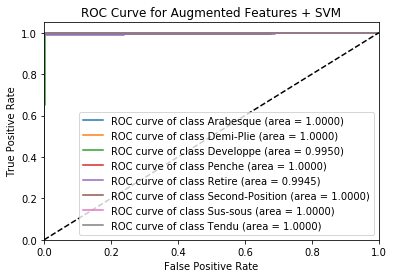

In [24]:
import matplotlib.pyplot as plt
#ROC and AUC
fpr = dict()
tpr = dict()
fnr = dict()
eer = dict()
totalEER = 0
roc_auc = dict()
n_classes = 8

#print(y_test.shape)
#print(y_score.shape)
#print(y_test_binarized.shape)
#Compute ROC curve for each class:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    fnr[i] = 1 - tpr[i]
    eer[i] = fpr[i][np.nanargmin(np.absolute((fnr[i]-fpr[i])))]
    totalEER += eer[i]
    roc_auc[i] = auc(fpr[i], tpr[i])
    
averageEER = totalEER/8
print("EER:" +averageEER.astype(str))
print('Equal Error Rate: {0:0.19f}'''.format(averageEER))
    
#Compute micro-average ROC curve and ROC area
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
#Plot ROC Curves:
plt.figure()

# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]))

arr_classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.4f})'
                                   ''.format(arr_classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Augmented Features + SVM')
plt.legend(loc="lower right")
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
print("ROC AUC Score:", roc_auc_score(y_test_binarized,y_score, average = 'macro'))

ROC AUC Score: 0.9986884810986386


In [14]:
#confusion matrix
print(confusion_matrix(y_test,y_pred))


[[189   0   1   0   0   0   0   0]
 [  0 184   0   0   0   0   0   0]
 [  0   0 174   0   0   0   0   1]
 [  0   0   0 169   0   0   0   0]
 [  0   0   1   1 166   0   0   0]
 [  0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0 185   0]
 [  0   0   0   0   0   0   0 166]]


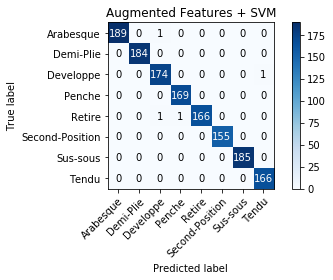

In [23]:
#Plot a confusion matrix
from sklearn.utils.multiclass import unique_labels
cm = confusion_matrix(y_test,y_pred)
cmap = plt.cm.Blues
classes = ['Arabesque','Demi-Plie','Developpe','Penche','Retire','Second-Position','Sus-sous','Tendu']

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Augmented Features + SVM',
           ylabel='True label',
           xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()


In [16]:
# get the FP, FN, TP, TN values
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
print("FP:", FP)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
print("FN:", FN)
TP = np.diag(conf_matrix)
print("TP:", TP)
TN = conf_matrix.sum() - (FP + FN + TP)
print("TN:", FP)

[[189   0   1   0   0   0   0   0]
 [  0 184   0   0   0   0   0   0]
 [  0   0 174   0   0   0   0   1]
 [  0   0   0 169   0   0   0   0]
 [  0   0   1   1 166   0   0   0]
 [  0   0   0   0   0 155   0   0]
 [  0   0   0   0   0   0 185   0]
 [  0   0   0   0   0   0   0 166]]
FP: [0 0 2 1 0 0 0 1]
FN: [1 0 1 0 2 0 0 0]
TP: [189 184 174 169 166 155 185 166]
TN: [0 0 2 1 0 0 0 1]


In [17]:
FAR = (sum(FP))/(sum(FP)+sum(TN))
print("My FAR:", FAR)

My FAR: 0.00041050903119868636


In [18]:
totalFAR = 0
for x in range(8):
    totalFAR += (FP[x])/(FP[x]+TN[x])
print("TotalFAR:", totalFAR)
avg = totalFAR/8
print("Computed Average FAR:", avg)

TotalFAR: 0.0032767075471690564
Computed Average FAR: 0.00040958844339613205


In [19]:
FRR = (sum(FN))/(sum(FN)+sum(TP))
print("My FRR:", FRR)

My FRR: 0.0028735632183908046


In [20]:
totalFRR = 0
for x in range(8):
    totalFRR += (FN[x])/(FN[x]+TP[x])
print("TotalFRR:", totalFRR)
avg = totalFRR/8
print("Computed Average FRR:", avg)

TotalFRR: 0.022882205513784462
Computed Average FRR: 0.0028602756892230578


In [21]:
#Specificity: TN/(TN+FP)
totalSpecificity = 0
for x in range(8):
    totalSpecificity += (TN[x])/(TN[x]+FP[x])
print("TotalSpecificity:", totalSpecificity)
avg = totalSpecificity/8
print("Computed Average Specificity:", avg)

TotalSpecificity: 7.996723292452831
Computed Average Specificity: 0.9995904115566039


In [22]:
#y_score = clf.predict_proba(X_test)
print(y_score[:1])

[[-2.03068594 -1.67476304 -1.86251755 -1.74323711 -1.86222878 -1.8758374
   1.45374    -1.62083936]]
